In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

In [20]:
DATA_PATH = "/home/brandon/Documents/Data Science/Final-Project-Climate-Change/"
global_temperatures = pd.read_csv(DATA_PATH + "GlobalLandTemperaturesByCountry.csv", parse_dates=['dt'])
global_temperatures.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [21]:
global_temperatures['dt'] = global_temperatures['dt'].apply(lambda x: x.year)
global_temperatures.columns = ['Year', 'AverageTemperature', 'AverageTemperatureUncertainty', 'Country']
  
global_temperatures.head()

,Year,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743,4.384,2.294,Åland
1,1743,NaN,NaN,Åland
2,1744,NaN,NaN,Åland
3,1744,NaN,NaN,Åland
4,1744,NaN,NaN,Åland


In [33]:
dates = global_temperatures['Year'].drop_duplicates().values
temps = global_temperatures.groupby(['Year']).mean()['AverageTemperature'].values

print("# OF YEARS: " + str(len(dates)))
print("MAX YEAR: " + str(max(dates)))

# OF YEARS: 271
MAX YEAR: 2013


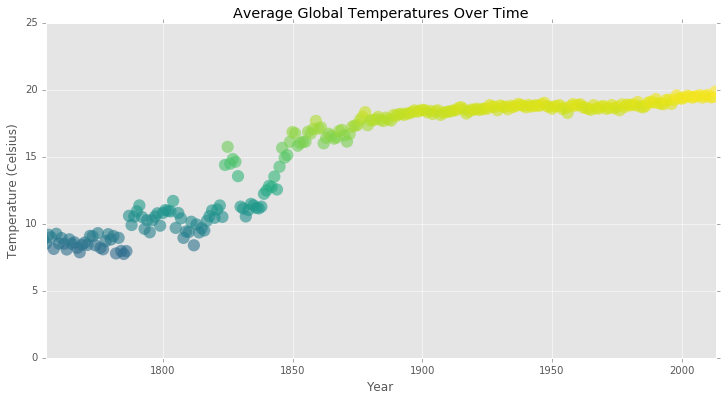

In [35]:
plt.figure(figsize=(12, 6))
plt.scatter(dates, temps, c=temps, s=150, alpha=0.6, edgecolors='none', cmap='viridis')
plt.xlim([1755, 2013])
plt.grid(True)
plt.title("Average Global Temperatures Over Time")
plt.xlabel("Year")
plt.ylabel("Temperature (Celsius)")
plt.show()

In [51]:
# Introduce Uncertainty
uncertainty = global_temperatures.groupby(['Year']).mean()['AverageTemperatureUncertainty'].values

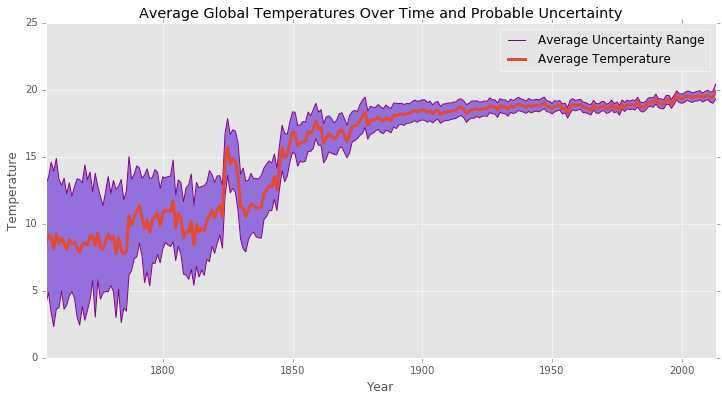

In [68]:
plt.figure(figsize=(12, 6))
plt.plot(dates, (temps + uncertainty), c='purple', label='Average Uncertainty Range')
plt.plot(dates, (temps - uncertainty), c='purple', label=None)
plt.fill_between(dates, (temps + uncertainty), (temps - uncertainty), facecolor='mediumpurple')
plt.plot(dates, temps, linewidth=3, label='Average Temperature')
plt.xlim([1755, 2013])
plt.ylim([0, 25])
plt.grid(True)
plt.title("Average Global Temperatures Over Time and Probable Uncertainty")
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.legend()
plt.show()

In [ ]:
# Subdivide by annual seasons
# TODO